In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00


In [ ]:
from transformers import ElectraTokenizer

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from transformers import ElectraTokenizer, TFElectraForSequenceClassification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import roc_curve, auc, confusion_matrix

In [ ]:
clickbait = pd.read_csv('main.csv')
clickbait

,title,label,label_score
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0
4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",non-clickbait,0
...,...,...,...
14995,"Tolak RUU Pertanahan, Ribuan Petani Siap Gelar...",non-clickbait,0
14996,Ada Niat Tambah Momongan Tanpa Ikut Program Ha...,clickbait,1
14997,"Beredar Isu Internet Papua Diblokir Lagi, Telk...",non-clickbait,0
14998,"TXT Akan Segera Comeback, Soobin Akui Gatal I...",clickbait,1


In [ ]:
clickbait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        15000 non-null  object
 1   label        15000 non-null  object
 2   label_score  15000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [ ]:
clickbait.isnull().sum()

title          0
label          0
label_score    0
dtype: int64

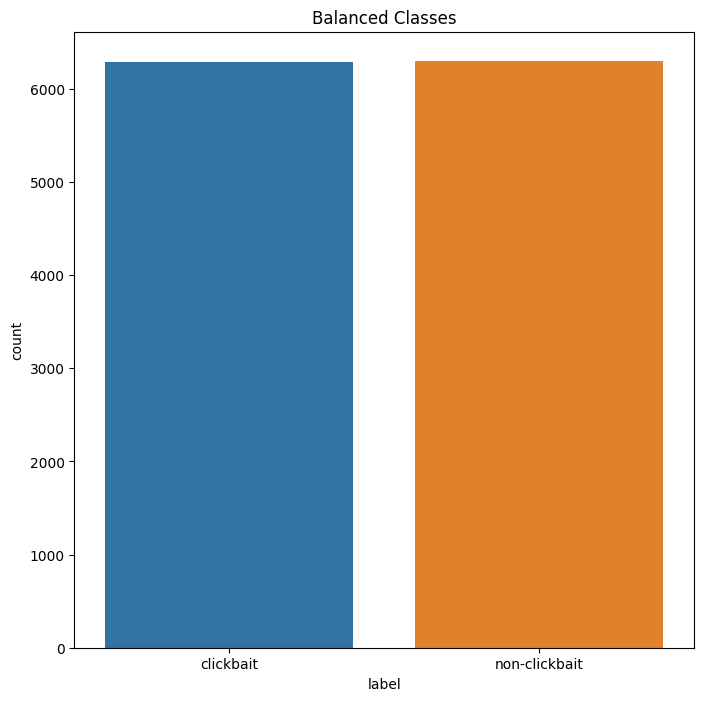

12590


In [ ]:
# UNDERSAMPLE IF NEEDED
click = clickbait.loc[clickbait['label'] == 'clickbait']
#print(len(click))
nonclick = clickbait.loc[clickbait['label'] == 'non-clickbait'].sample(n=6300,random_state=22)
nonclickori = clickbait.loc[clickbait['label_score'] == 'non-clickbait']
#print(len(nonclickori))

# Concatenate both dataframes again
normalized_df = pd.concat([click, nonclick])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(x='label', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

tags = normalized_df.label_score
texts = normalized_df.title

#texts
print(len(texts))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
import string
from wordcloud import WordCloud
import requests

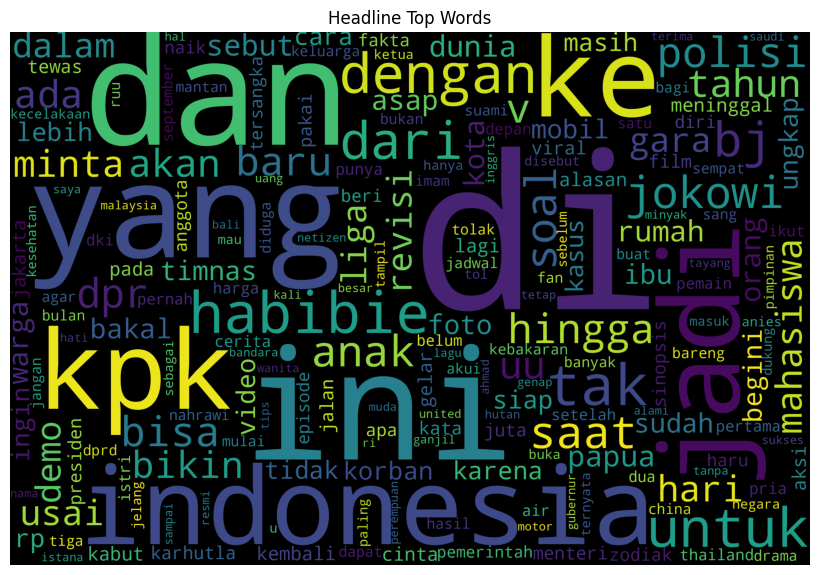

In [ ]:
def word_cloud(series,title=''):
    input_words =''
    series = series.astype('string')

    for i in series:
        words = i.split(' ')
        input_words +=  " ".join([words[j].lower().strip(string.punctuation) for j in range(len(words))])+" "

    wordcloud = WordCloud(width = 3000,
                          height = 2000,
                          random_state=1,
                          collocations=False).generate(input_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    wordcloud.to_file(title+'.png')
    plt.show()

word_cloud(normalized_df.title,title = 'Headline Top Words')

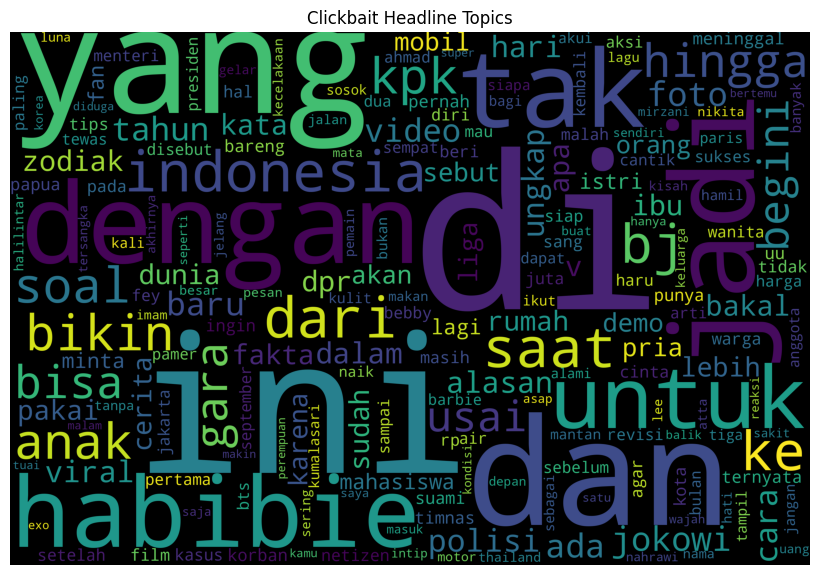

In [ ]:
word_cloud(normalized_df[normalized_df['label_score']==1].title,title = 'Clickbait Headline Topics')

In [ ]:
master = "https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt"
req = requests.get(master)

In [ ]:
stopwords = req.text.splitlines()

In [ ]:
def word_cloud(series,title=''):
    input_words =''
    series = series.astype('string')

    for i in series:
        words = i.split(' ')
        input_words +=  " ".join([words[j].lower().strip(string.punctuation) for j in range(len(words)) if words[j].lower().strip(string.punctuation) not in stopwords])+" "

    wordcloud = WordCloud(width = 3000,
                          height = 2000,
                          random_state=1,
                          collocations=False).generate(input_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    wordcloud.to_file(title+'.png')
    plt.show()

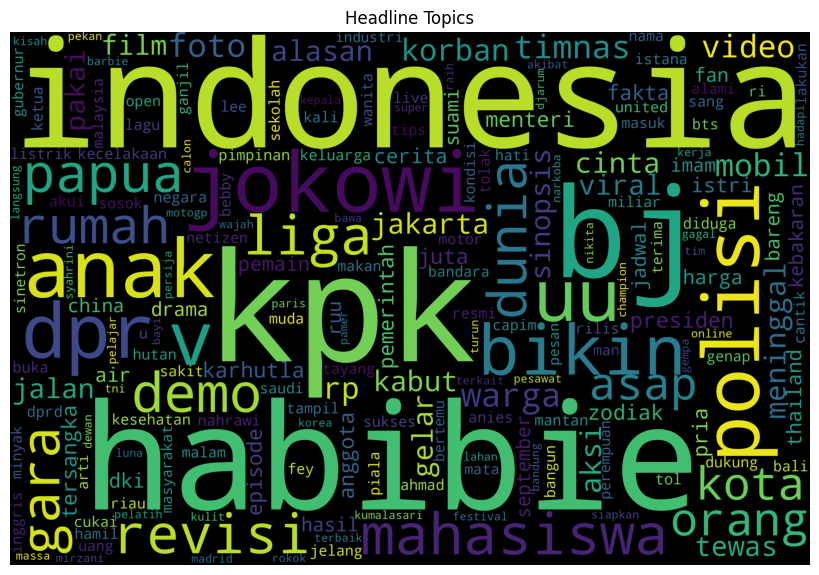

In [ ]:
word_cloud(normalized_df.title,title = 'Headline Topics')

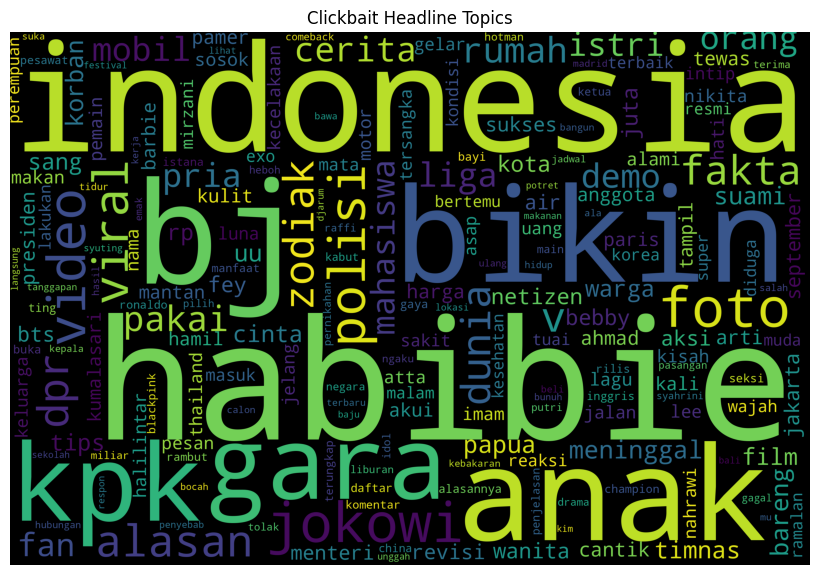

In [ ]:
word_cloud(normalized_df[normalized_df['label_score']==1].title,title = 'Clickbait Headline Topics')

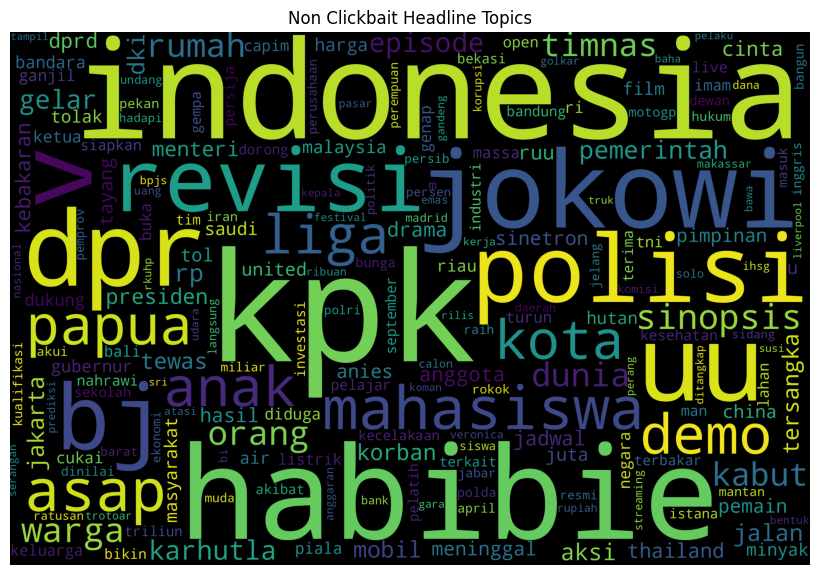

In [ ]:
word_cloud(normalized_df[normalized_df['label_score']==0].title,title = 'Non Clickbait Headline Topics')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
to_del = stopwords + [''] + [x for x in string.punctuation]

def bigram(series,title='',lower=0,upper=10):
    series = series.astype('string')
    to_bigrams = []
    for j in range(len(series)):
      words = word_tokenize(series.iloc[j])
      words = [word.strip(string.punctuation).lower() for word in words ]
      words = [word.strip(string.punctuation).lower() for word in words if word.strip(string.punctuation).lower() not in to_del]
      to_bigrams.append(" ".join(words).replace('"','').replace('`','').replace("'",''))
    bigrams = [j for i in to_bigrams for j in zip(i.split(" ")[:-1], i.split(" ")[1:]) ]
    bigrams = pd.Series(bigrams)
    # plt.figure(figsize=(14,14))
    bar_bigrams = sns.barplot(x=bigrams.value_counts()[lower:upper],y=bigrams.value_counts().index[lower:upper])
    plt.title(title)
    bar_bigrams.get_figure().savefig(title+'.png')
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


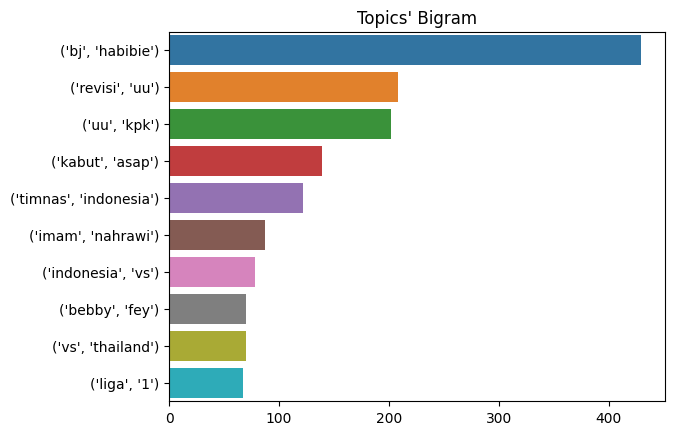

In [ ]:
bigram(normalized_df.title,title = "Topics' Bigram")

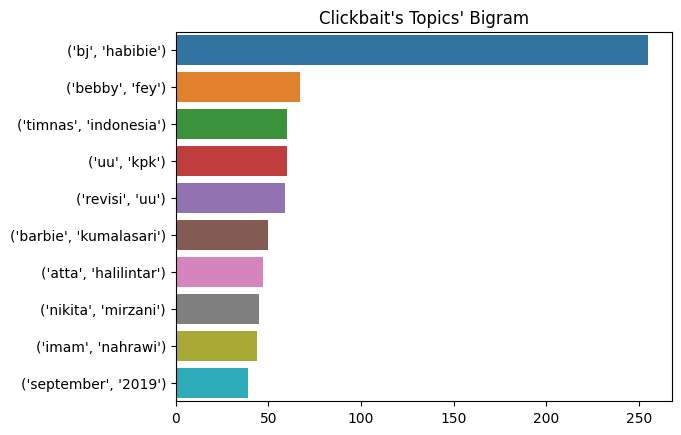

In [ ]:
bigram(normalized_df[normalized_df['label_score']==1].title,title = "Clickbait's Topics' Bigram")

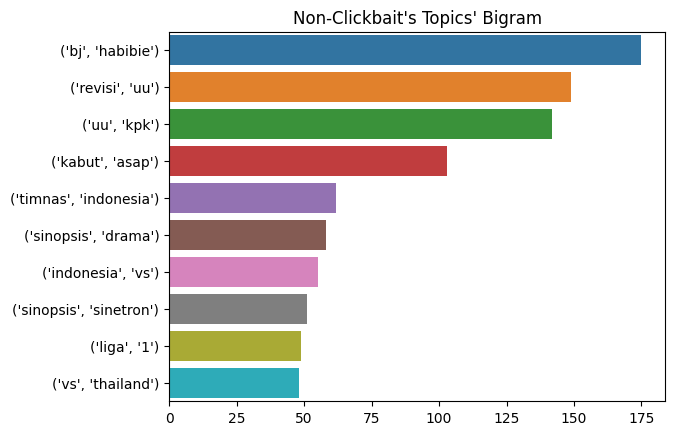

In [ ]:
bigram(normalized_df[normalized_df['label_score']==0].title,title = "Non-Clickbait's Topics' Bigram")

In [ ]:
from tqdm import tqdm
def text_size(normalized_df,texts='title'):
    sizes = []
    for text in tqdm(normalized_df[texts]):
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)

In [ ]:
import plotly.graph_objects as go

In [ ]:
normalized_df['len_title'] = text_size(normalized_df,texts='title')


fake_ = normalized_df[normalized_df['label_score']==0]
true_ = normalized_df[normalized_df['label_score']==1]
fig = go.Figure()
fig.add_trace(go.Box(y=list(fake_['len_title']), name='Non-Clickbait',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=list(true_['len_title']), name = 'Clickbait',
                marker_color = 'indianred'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'white',
        'title': 'Box plot',

})

fig.show()

100%|██████████| 12590/12590 [00:00<00:00, 957954.56it/s]


In [ ]:
nonalphanum = normalized_df.copy()
nonalphanum['isalnum'] = nonalphanum['title'].map(lambda x: (x.replace(" ","").isalnum()))
nonalphanum_clickbait = nonalphanum[nonalphanum['label']=='clickbait'].groupby('isalnum').count()
nonalphanum_nonclickbait = nonalphanum[nonalphanum['label']=='non-clickbait'].groupby('isalnum').count()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[nonalphanum_clickbait.iloc[0]['title'], nonalphanum_clickbait.iloc[1]['title']],
                        labels=['has special characters','alpha numeric'], hole=.7,
                        title='clickbait'), row=1, col=1)

fig.append_trace(go.Pie(values=[nonalphanum_nonclickbait.iloc[0]['title'], nonalphanum_nonclickbait.iloc[1]['title']],
                        labels=['has special characters','alpha numeric'], hole=.7,
                        title='non-clickbait'), row=1, col=2)
fig.update_traces(marker=dict(colors=['red','lightblue']))
fig.show()

In [ ]:
# Define Electra tokenizer
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')

In [ ]:
# Encode text using Electra tokenizer
max_length = 1500
X = []
for text in normalized_df['title']:
    encoding = tokenizer.encode(text, add_special_tokens=True, max_length=max_length, padding='max_length', truncation=True)
    X.append(encoding)
X = pad_sequences(X, maxlen=max_length, dtype='int32', padding='post', truncating='post', value=0)

In [ ]:
# Convert labels to categorical
y = to_categorical(normalized_df['label_score'], num_classes=2)

In [ ]:
# Split data into training and validation sets
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio, random_state = 24)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio / (test_ratio + validation_ratio), random_state = 42)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("x_val shape: ", x_val.shape)
print("y_train shape: ", len(y_train))
print("y_test shape: ", len(y_test))
print("y_val shape: ", len(y_val))

x_train shape:  (10072, 1500)
x_test shape:  (1259, 1500)
x_val shape:  (1259, 1500)
y_train shape:  10072
y_test shape:  1259
y_val shape:  1259


In [ ]:
# VOCAB_SIZE = 2000
# MAX_LEN = 50
# tkz = tokenizer(num_words=VOCAB_SIZE)
# tkz.fit_on_texts(x_train)
# sequences = tkz.texts_to_sequences(x_train)
# sequences = sequence.pad_sequences(sequences, maxlen=MAX_LEN)

In [ ]:
# Define Electra model
model = TFElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', num_labels=2)

Some layers from the model checkpoint at google/electra-base-discriminator were not used when initializing TFElectraForSequenceClassification: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM, GlobalMaxPooling1D
from keras.layers import Dropout
from keras.layers import Embedding

In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM, GlobalMaxPooling1D
from keras.layers import Dropout
from keras.layers import Embedding

#Initialize RNN:
model = Sequential()

In [ ]:
#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

In [ ]:
#Compile the RNN
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1500, 50)          2600      
                                                                 
 dropout_38 (Dropout)        (None, 1500, 50)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1500, 50)          5050      
                                                                 
 dropout_39 (Dropout)        (None, 1500, 50)          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1500, 50)          5050      
                                                                 
 dropout_40 (Dropout)        (None, 1500, 50)          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

In [ ]:
#Fitting the RNN to the Training set
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs= 10)

Epoch 1/10
315/315 [==============================] - 419s 1s/step - loss: 0.3945 - accuracy: 0.5000 - val_loss: 0.2564 - val_accuracy: 0.5000
Epoch 2/10
315/315 [==============================] - 418s 1s/step - loss: 0.2875 - accuracy: 0.5000 - val_loss: 0.2537 - val_accuracy: 0.5000
Epoch 3/10
315/315 [==============================] - 414s 1s/step - loss: 0.2661 - accuracy: 0.5000 - val_loss: 0.2509 - val_accuracy: 0.5000
Epoch 4/10
315/315 [==============================] - 416s 1s/step - loss: 0.2576 - accuracy: 0.5000 - val_loss: 0.2508 - val_accuracy: 0.5000
Epoch 5/10
315/315 [==============================] - 414s 1s/step - loss: 0.2540 - accuracy: 0.5000 - val_loss: 0.2519 - val_accuracy: 0.5000
Epoch 6/10
315/315 [==============================] - 408s 1s/step - loss: 0.2523 - accuracy: 0.5000 - val_loss: 0.2506 - val_accuracy: 0.5000
Epoch 7/10
315/315 [==============================] - 411s 1s/step - loss: 0.2516 - accuracy: 0.5000 - val_loss: 0.2506 - val_accuracy: 0.5000

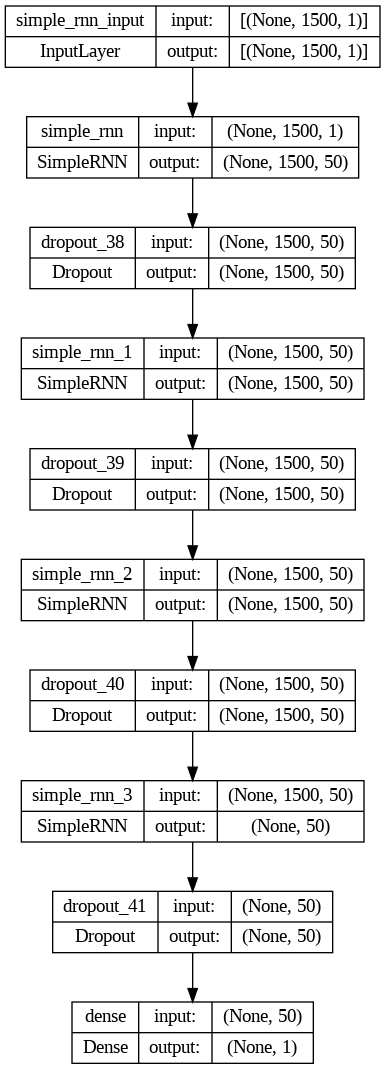

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# dataset_total = pd.concat((x_train['title'], x_test['title']), axis=0)
# inputs = dataset_total[len(dataset_total)-len(dataset_total)-60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)
# x_test = []
# for i in range(60,80):
#   x_test.append(inputs[1-60:i, 0])
# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# predicted_clickbait = regressor.predict(x_test)
# predicted_clickbait = sc.inverse_transform(predicted_clickbait)

In [ ]:
# plt.plot(normalized_df, color='red', label='Clickbait')
# plt.plot(click, color='blue', label='Predicted Clickbait')
# plt.title('Clickbait Headline Indonesian News Prediction')
# plt.xlabel('Count')
# plt.ylabel('Clickbait')
# plt.legend()
# plt.show()

In [ ]:
pip install scikit-learn

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
# y_pred = model.predict(x_test)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import classification_report, precision_score, recall_score

# # One-hot encoding pada y_val
# encoder = OneHotEncoder(sparse=False)
# y_val_encoded = encoder.fit_transform(y_val)

# # Mengubah prediksi menjadi kategori menggunakan threshold
# threshold = 0.5
# y_pred_category = (y_pred > threshold).astype(int)

# # Melakukan evaluasi menggunakan metrik klasifikasi
# print(classification_report(y_val_encoded, y_pred_category, labels=[0, 1]))
# print('Precision avg:', precision_score(y_val_encoded, y_pred_category, average='weighted'))
# print('Recall avg:', recall_score(y_val_encoded, y_pred_category, average='weighted'))


In [ ]:
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# y_pred = (y_pred > threshold).astype(int)

In [ ]:
def plot_acc_loss(hist):
  hist = pd.DataFrame(hist.history)
  hist[['accuracy','val_accuracy']].plot()
  plt.show()
  hist[['loss','val_loss']].plot()
  plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,make_scorer,precision_score,recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluation(model,X,y,result_table,label='',batch_size=32,threshold=.5):
  plt.clf()
  score = model.predict(X, batch_size=batch_size, verbose=1)[0]
  result = (score > threshold).astype('int32')
  print(classification_report(y,result.ravel(), labels=[0,1]))
  print('Precision avg :', precision_score(y,result.ravel(),average='weighted'))
  print('Recall avg :', recall_score(y,result.ravel(),average='weighted'))

  matrix_confusion = confusion_matrix(y,result.ravel())
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
  plt.show()
  if(label!=''):
    result_table = draw_roc(y, result.ravel(),label,result_table)
  return result_table

plot_acc_loss(history)
result_table = evaluation(model,x_val,y_val,result_table,'ELECTRA',32,.5)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score

score = model.predict(X, batch_size=32, verbose=1)[0]
result = (score > threshold).astype('int32')
result = np.squeeze(result)  # Menghilangkan dimensi yang tidak diinginkan
print(classification_report(y, result, labels=[0, 1]))
print('Precision avg:', precision_score(y, result, average='weighted'))
print('Recall avg:', recall_score(y, result, average='weighted'))

In [ ]:
print("Jumlah sampel y:", len(y))
print("Jumlah sampel result:", len(result))
if len(y) == len(result):
    print(classification_report(y, result.ravel(), labels=[0, 1]))
    print('Precision avg:', precision_score(y, result.ravel(), average='weighted'))
    print('Recall avg:', recall_score(y, result.ravel(), average='weighted'))
else:
    print("Error: Jumlah sampel tidak sesuai antara y dan result")

print("Dimensi y:", y.shape)
print("Dimensi result:", result.shape)

In [ ]:
# y_train = y_train.reshape(y_train.shape[0],1)
# y_pred = y_pred.reshape(y_pred.shape[0],1)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score

y_train = y_train.reshape(train.shape[0],1)
y_pred = y_train.reshape(train.shape[0],1)

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print("Precision:", precision)
print("Recall:", recall)

In [ ]:
scores = model.predict(y_pred)
print("Auc: %.2f%%" % (roc_auc(scores,y_valid)))